In [ ]:
#only the 95% of categories (46)

In [ ]:
#docker run -it --rm -v c:/workspace/jupyter:/tf -p 8888:8888 tensorflow/tensorflow:latest-gpu-jupyter
#2021-01-05
# !pip install pandas
# !pip install tensorflow_hub
# !pip install tensorflow_text
# !pip install tensorflowjs

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(precision=3, suppress=True) # easy to read read only

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import json
import re

In [3]:
print("Version: ", tf.__version__)
raw_data = pd.read_csv('data/S_SURVEY_FULL.csv')
# raw_data.head()



Version:  2.4.0


In [4]:
# features / labels / Y
_cat_list = list()
_min_num = len(raw_data) * .05

for c in list(raw_data.columns)[1:(len(raw_data.columns)-1)]:
    if(raw_data[[c]].sum().tolist()[0] > _min_num):
        _cat_list.append(c)
expect = raw_data.loc[:, _cat_list]
Y = np.array(expect)
feature = np.array(raw_data.loc[:,['JSON']]).reshape(-1)
print(feature.shape,len(_cat_list))

(2543,) 46


In [5]:
# train / text / X
VOCAB_SIZE=400
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)
ff = np.array([re.sub('[^0-9a-zA-Z_\\.]+', ' ', xx) for xx in feature])
encoder.adapt(ff)
print(np.array(encoder.get_vocabulary()).shape, len(encoder.get_vocabulary()))
print(ff.shape,Y.shape)

(400,) 400
(2543,) (2543, 46)


In [6]:
output_den = len(Y[0]);

model = tf.keras.Sequential()
model.add(encoder)

model.add(tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),mask_zero=True,
                                    output_dim=16))
# model.add(tf.keras.layers.LSTM(64))

model.add(tf.keras.layers.Dense(256, activation='relu'))

# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(128, activation='tanh'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_den, activation='sigmoid'))


# model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.01,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

5/5 [==============================] - 3s 430ms/step - loss: 0.6914 - accuracy: 0.0429 - val_loss: 0.6846 - val_accuracy: 0.0000e+00


In [7]:
checkpoint_path = "../checkpoint/survey_short_full.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

def plotHistory(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
history = model.fit(x=ff,y=Y,
                    epochs=1,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
                     callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

# plotHistory(history)

In [31]:
history = model.fit(x=ff,y=Y,
                    epochs=500,batch_size=512,
                    validation_split=0.1,
                     verbose=1,
#                      callbacks=[cp_callback],
                    use_multiprocessing=True
                   )

Epoch 1/500
5/5 [==============================] - 1s 283ms/step - loss: 0.1052 - accuracy: 0.1228 - val_loss: 0.1695 - val_accuracy: 0.0510
Epoch 2/500
5/5 [==============================] - 1s 258ms/step - loss: 0.1044 - accuracy: 0.1215 - val_loss: 0.1681 - val_accuracy: 0.0510
Epoch 3/500
5/5 [==============================] - 1s 249ms/step - loss: 0.1044 - accuracy: 0.1215 - val_loss: 0.1688 - val_accuracy: 0.0510
Epoch 4/500
5/5 [==============================] - 1s 261ms/step - loss: 0.1038 - accuracy: 0.1211 - val_loss: 0.1708 - val_accuracy: 0.0510
Epoch 5/500
5/5 [==============================] - 1s 253ms/step - loss: 0.1044 - accuracy: 0.1211 - val_loss: 0.1712 - val_accuracy: 0.0510
Epoch 6/500
5/5 [==============================] - 1s 275ms/step - loss: 0.1042 - accuracy: 0.1176 - val_loss: 0.1680 - val_accuracy: 0.0510
Epoch 7/500
5/5 [==============================] - 1s 281ms/step - loss: 0.1044 - accuracy: 0.1189 - val_loss: 0.1666 - val_accuracy: 0.0510
Epoch 8/500
5

Epoch 59/500
5/5 [==============================] - 1s 260ms/step - loss: 0.1028 - accuracy: 0.1193 - val_loss: 0.1677 - val_accuracy: 0.0510
Epoch 60/500
5/5 [==============================] - 1s 290ms/step - loss: 0.1030 - accuracy: 0.1206 - val_loss: 0.1669 - val_accuracy: 0.0510
Epoch 61/500
5/5 [==============================] - 1s 255ms/step - loss: 0.1031 - accuracy: 0.1158 - val_loss: 0.1694 - val_accuracy: 0.0510
Epoch 62/500
5/5 [==============================] - 1s 252ms/step - loss: 0.1037 - accuracy: 0.1246 - val_loss: 0.1706 - val_accuracy: 0.0510
Epoch 63/500
5/5 [==============================] - 1s 271ms/step - loss: 0.1040 - accuracy: 0.1211 - val_loss: 0.1718 - val_accuracy: 0.0510
Epoch 64/500
5/5 [==============================] - 1s 267ms/step - loss: 0.1044 - accuracy: 0.1171 - val_loss: 0.1708 - val_accuracy: 0.0510
Epoch 65/500
5/5 [==============================] - 1s 288ms/step - loss: 0.1039 - accuracy: 0.1224 - val_loss: 0.1696 - val_accuracy: 0.0510
Epoch 

5/5 [==============================] - 1s 278ms/step - loss: 0.1004 - accuracy: 0.1228 - val_loss: 0.1723 - val_accuracy: 0.0510
Epoch 174/500
5/5 [==============================] - 1s 267ms/step - loss: 0.0997 - accuracy: 0.1267 - val_loss: 0.1756 - val_accuracy: 0.0510
Epoch 175/500
5/5 [==============================] - 1s 255ms/step - loss: 0.1009 - accuracy: 0.1233 - val_loss: 0.1720 - val_accuracy: 0.0510
Epoch 176/500
5/5 [==============================] - 1s 273ms/step - loss: 0.1002 - accuracy: 0.1228 - val_loss: 0.1756 - val_accuracy: 0.0510
Epoch 177/500
5/5 [==============================] - 1s 275ms/step - loss: 0.1000 - accuracy: 0.1202 - val_loss: 0.1717 - val_accuracy: 0.0549
Epoch 178/500
5/5 [==============================] - 1s 269ms/step - loss: 0.1000 - accuracy: 0.1215 - val_loss: 0.1697 - val_accuracy: 0.0510
Epoch 179/500
5/5 [==============================] - 1s 257ms/step - loss: 0.1016 - accuracy: 0.1228 - val_loss: 0.1719 - val_accuracy: 0.0510
Epoch 180/500

5/5 [==============================] - 1s 280ms/step - loss: 0.0974 - accuracy: 0.1263 - val_loss: 0.1732 - val_accuracy: 0.0510
Epoch 288/500
5/5 [==============================] - 1s 273ms/step - loss: 0.0972 - accuracy: 0.1254 - val_loss: 0.1774 - val_accuracy: 0.0510
Epoch 289/500
5/5 [==============================] - 1s 276ms/step - loss: 0.0975 - accuracy: 0.1224 - val_loss: 0.1766 - val_accuracy: 0.0510
Epoch 290/500
5/5 [==============================] - 1s 261ms/step - loss: 0.0970 - accuracy: 0.1241 - val_loss: 0.1762 - val_accuracy: 0.0510
Epoch 291/500
5/5 [==============================] - 1s 278ms/step - loss: 0.0968 - accuracy: 0.1246 - val_loss: 0.1776 - val_accuracy: 0.0510
Epoch 292/500
5/5 [==============================] - 1s 247ms/step - loss: 0.0963 - accuracy: 0.1246 - val_loss: 0.1762 - val_accuracy: 0.0510
Epoch 293/500
5/5 [==============================] - 1s 267ms/step - loss: 0.0971 - accuracy: 0.1237 - val_loss: 0.1785 - val_accuracy: 0.0510
Epoch 294/500

5/5 [==============================] - 1s 279ms/step - loss: 0.0955 - accuracy: 0.1228 - val_loss: 0.1781 - val_accuracy: 0.0510
Epoch 402/500
5/5 [==============================] - 1s 271ms/step - loss: 0.0941 - accuracy: 0.1233 - val_loss: 0.1793 - val_accuracy: 0.0549
Epoch 403/500
5/5 [==============================] - 1s 278ms/step - loss: 0.0937 - accuracy: 0.1298 - val_loss: 0.1790 - val_accuracy: 0.0549
Epoch 404/500
5/5 [==============================] - 1s 259ms/step - loss: 0.0941 - accuracy: 0.1324 - val_loss: 0.1794 - val_accuracy: 0.0510
Epoch 405/500
5/5 [==============================] - 1s 262ms/step - loss: 0.0935 - accuracy: 0.1263 - val_loss: 0.1816 - val_accuracy: 0.0510
Epoch 406/500
5/5 [==============================] - 1s 273ms/step - loss: 0.0936 - accuracy: 0.1254 - val_loss: 0.1803 - val_accuracy: 0.0549
Epoch 407/500
5/5 [==============================] - 1s 275ms/step - loss: 0.0938 - accuracy: 0.1241 - val_loss: 0.1810 - val_accuracy: 0.0549
Epoch 408/500

80/80 [==============================] - 0s 6ms/step - loss: 0.0999 - accuracy: 0.1199


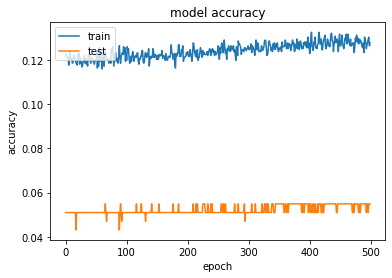

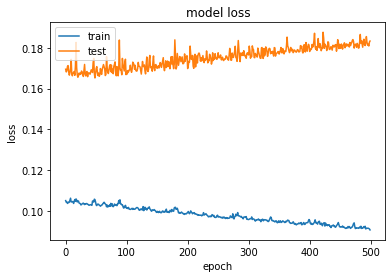

In [42]:
model.evaluate(ff,Y)
plotHistory(history)

In [8]:
# model.load_weights(checkpoint_path)
# model.save_weights(checkpoint_path)
# model.save('../model/survey_short_full')


In [9]:
all_predict=model.predict(ff[:])
error_matrix=(np.absolute(Y - all_predict) > .5).astype(int)
_total = error_matrix.sum()
print(_total, len(Y), _total / len(Y), _total / len(Y) / len(Y[0]))
print(np.average(error_matrix.sum(axis=1) / len(Y[0])))

4685 2543 1.8423122296500196 0.040050265861956945
0.040050265861956945


In [17]:
full_expect = raw_data[raw_data.columns[1:(len(raw_data.columns)-1)]]
np_pred = (all_predict > 0.5).astype(int)
full_predict = full_expect.copy()
for col in full_predict.columns:
    full_predict[col].values[:] = 0
for idx, name in enumerate (_cat_list) :
    full_predict[name] = np_pred[:,idx]
full_predict = full_predict[full_expect.columns]
full_error=np.absolute(np.array(full_expect) - np.array(full_predict))
_total = full_error.sum()
print('Wrong:', _total, len(full_error), 'Wrong in row:', _total / len(full_error), _total / len(full_error) / len(full_error[0]))

Wrong: 16106 2543 Wrong in row: 6.333464412111679 0.009896038143924498
